In [9]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [12]:
dataset = pandas.read_csv('C:/Users/My Computer/iris.txt')

In [13]:
dataset.head()
dataset.tail()
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


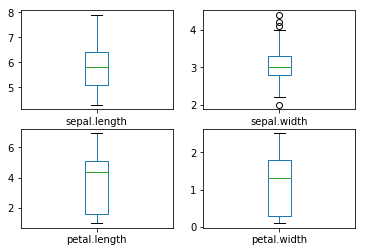

In [14]:
dataset.plot(kind='box', subplots=True, layout=(2,2),
            sharex=False, sharey=False)
plt.show()

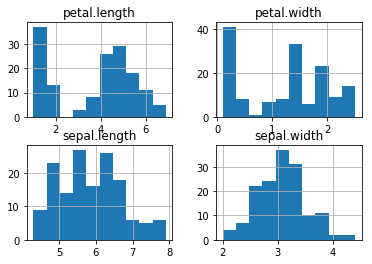

In [15]:
dataset.hist()
plt.show()

## Latihan 1

In [25]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
clf.predict([[2., 2.]])

array([1])

In [27]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [28]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [29]:
clf.support_

array([0, 1])

In [30]:
clf.n_support_

array([1, 1])

## Latihan 2

In [31]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X, Y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
dec = clf.decision_function([[1]])
dec.shape[1]

6

In [33]:
clf.decision_function_shape="ovr"
dec = clf.decision_function([[1]])
dec.shape[1]

4

In [34]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [35]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

## Latihan 3.1

In [36]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

x (100, 2) y (100,)


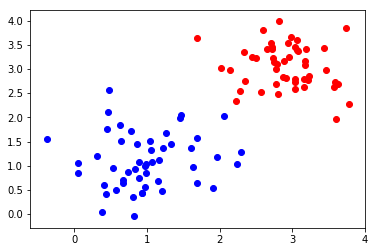

In [37]:
DIM = 2
COLORS = ['red', 'blue']

M1 = np.ones((DIM, ))
M2 = 3 * np.ones((DIM, ))
C1 = np.diag(0.3 * np.ones((DIM, )))
C2 = np.diag(0.2 * np.ones((DIM, )))

def generate_gaussian (m, c, num) :
    return np.random.multivariate_normal(m, c, num)

def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
    plt.show()

NUM = 50
if __name__ == '__main__':
    
    x1 = generate_gaussian(M1, C1, NUM)
    
    y1 = np.ones((x1.shape[0],))
    
    x2 = generate_gaussian(M2, C2, NUM)
    y2 = -np.ones((x2.shape[0],))
    
    x = np.concatenate((x1, x2), axis = 0)
    y = np.concatenate((y1, y2), axis = 0)
    print('x {} y {}'.format(x.shape, y.shape))
    plot_data_with_labels(x, y)
    
    with open('gaussiandata.pickle', 'wb') as f:
        pickle.dump((x, y), f)

## Latihan 3.2

In [53]:
import numpy as np
import pickle, sys
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

def fit(x, y): 
    NUM = x.shape[0]
    DIM = x.shape[1]

    K = y[:, None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1)))
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    return alphas

ModuleNotFoundError: No module named 'cvxopt'

In [52]:
alphas = fit(x, y)

w = np.sum(alphas * y[:, None] * x, axis = 0)

cond = (alphas > 1e-4).reshape(-1)
b = y[cond] - np.dot(x[cond], w)
bias = b[0]

def plot_separator(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(0, 6)
    ax.plot(x, x * slope + intercept, 'k-')

NameError: name 'matrix' is not defined

####  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Latihan a

In [49]:
import numpy as np
x = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
C = 0.1
clf = SVC(kernel='linear', C=C).fit(x, y)
clf.fit(x, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
print(clf.predict([[-0.8, -1]]))

[1]


## Latihan b

In [54]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
x, y = make_classification(n_features=4, random_state=0)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [55]:
print(clf.coef_)

[[0.0855181  0.39414765 0.49848052 0.37514311]]


In [56]:
print(clf.intercept_)

[0.28417574]


In [57]:
print(clf.predict([[0,0,0,0]]))

[1]


## Latihan c

In [58]:
import numpy as np
x = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma=0.7, C=C).fit(x, y)
clf.fit(x, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Latihan d

In [59]:
import numpy as np
x = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC(kernel='poly', degree=3, C=C).fit(x, y)
clf.fit(x, y)

C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
print(clf.predict([[-0.8, -1]]))

[1]


## Latihan e

Automatically created module for IPython interactive environment


C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


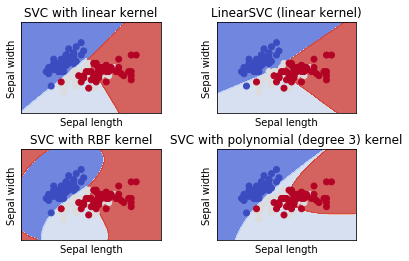

In [63]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

h = .02 

C = 1.0  
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()